# Table of Contents

- Introduction
- Importing Libraries
- Data importing
- Data inspecting
- EDA
    - LabelEncoder
- Data preprocessing
    - StandardScaler
    - PCA
- Model Building
- Deployment using Streamlit.

# Introduction

Breast cancer (BC) is one of the most common cancers among women worldwide, representing
the majority of new cancer cases and cancer-related deaths according to global statistics,
making it a significant public health problem in today’s society.
The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it
can promote timely clinical treatment to patients.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
1. texture (standard deviation of gray-scale values)
1. perimeter
1. area
1. smoothness (local variation in radius lengths)
1. compactness (perimeter^2 / area - 1.0)
1. concavity (severity of concave portions of the contour)
1. concave points (number of concave portions of the contour)
1. symmetry
1. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

# Data Importing

In [2]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/s-k3278/Breast-cancer-data/main/data.csv')

# Data Inspecting

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
len(df.columns)

33

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can remove the id column as it doesn't help us in anyway.

In [8]:
df.drop('id',axis=1,inplace=True)

We see that the diagnosis column is of object type hence we need to encode it.

In [9]:
encoder = LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])

In [10]:
df.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

We can see that the column Unnamed: 32 is having all null values and its safe to drop it.

In [11]:
df.drop('Unnamed: 32', axis=1, inplace = True)

Text(0.5, 1.0, 'Count plot for Diagnosis')

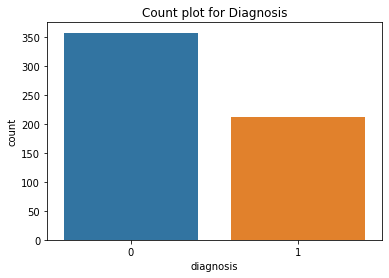

In [14]:
sns.countplot(x='diagnosis', data=df).set_title('Count plot for Diagnosis')

### We see that benign is more occuring in the dataset than malignant.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f775ee5cd50>,
      dtype=object)

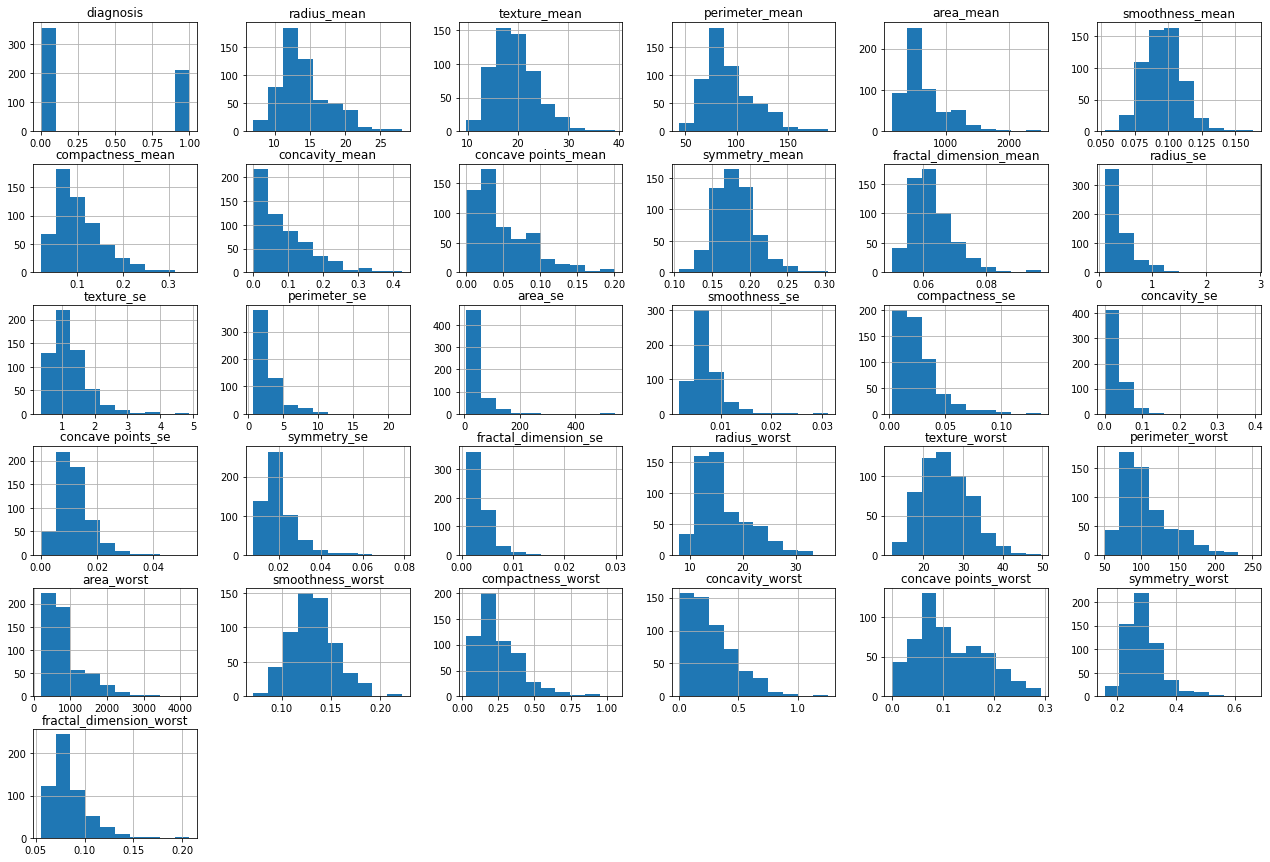

In [15]:
df.hist(figsize = (22,15))

### Wcan see many features have highly Skewed data that can be treated.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


### We can see the differences in numerical values of some features are large so we need to apply Scaling.

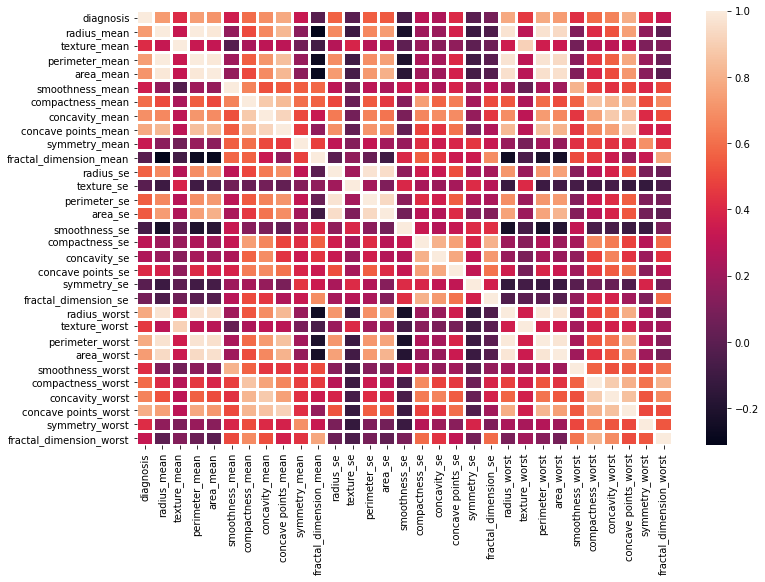

In [17]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=False, linewidths = 2)
plt.show()

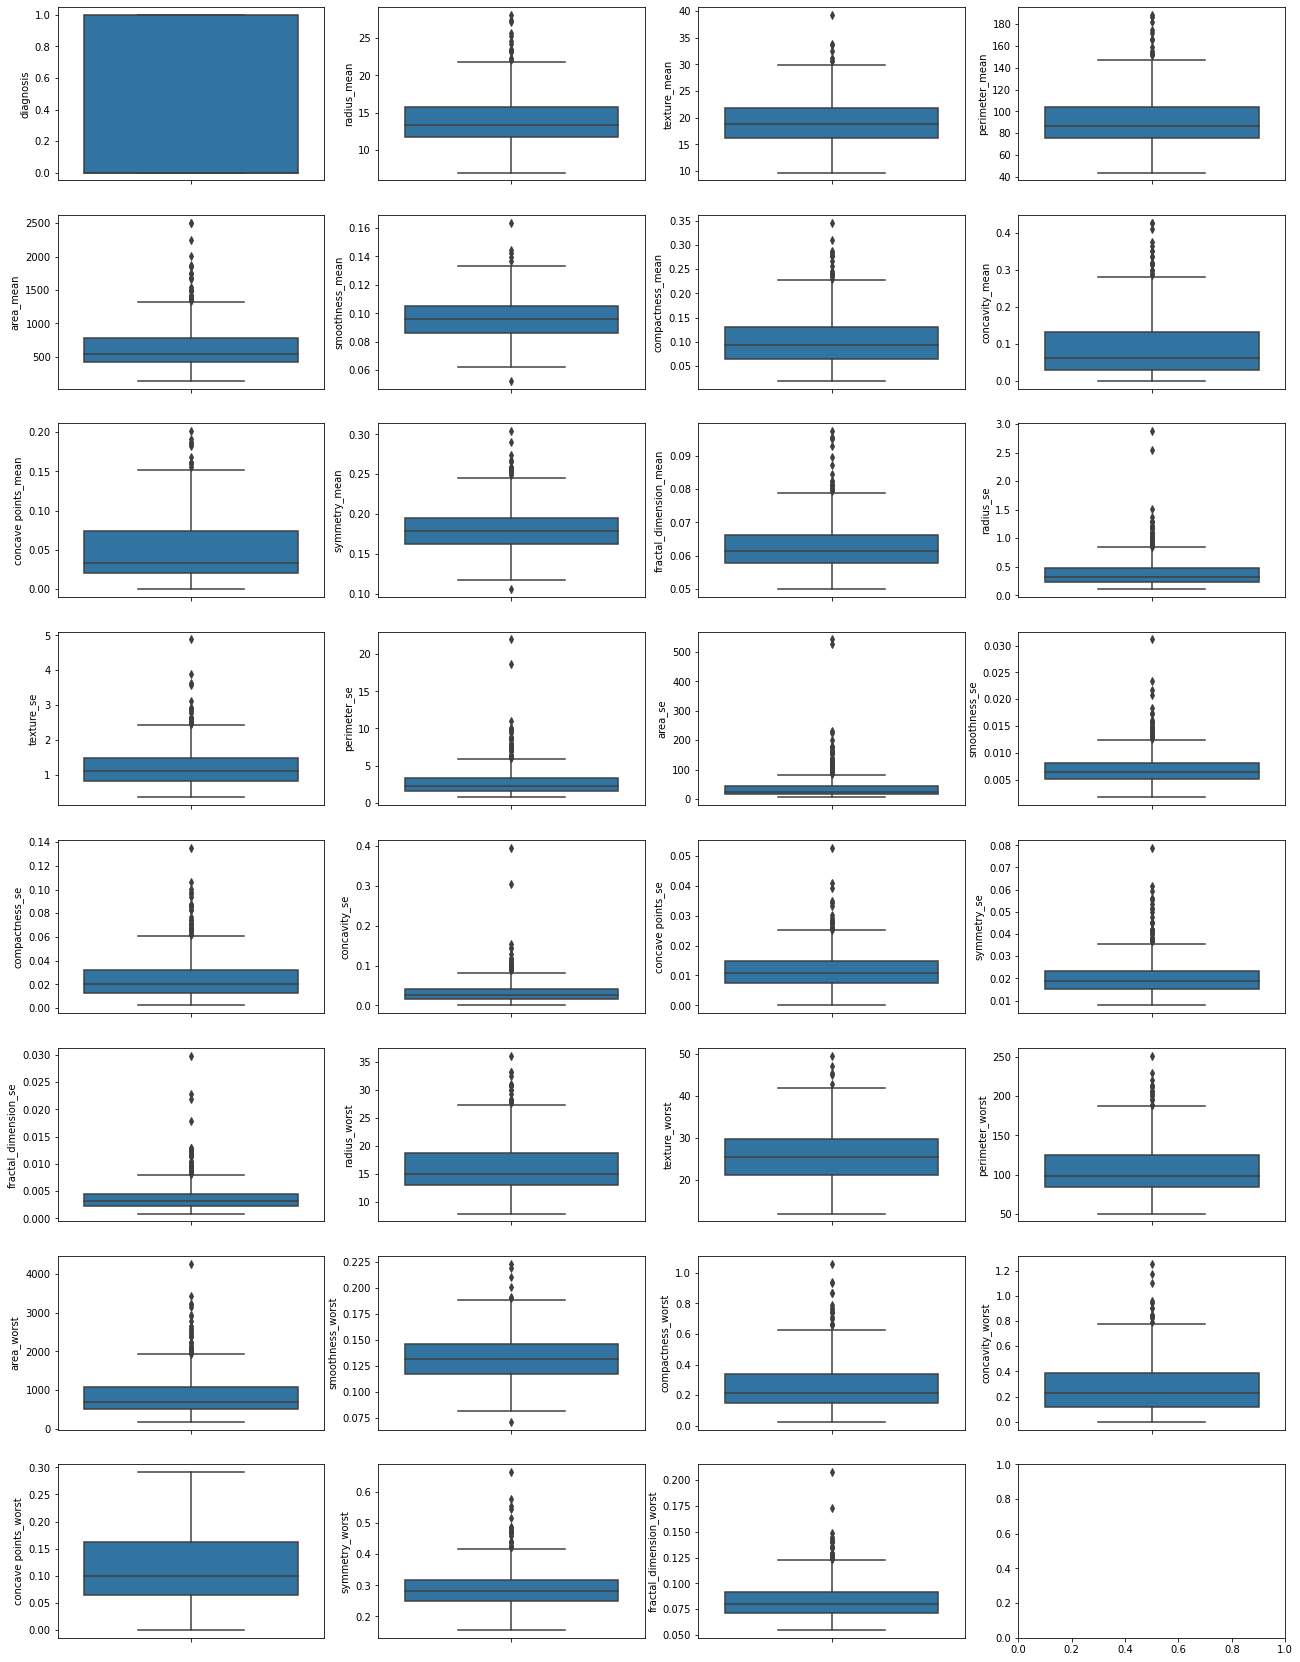

In [18]:
fig, ax = plt.subplots(ncols=4,nrows=8, figsize = (22,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1

### We can find a lot of outliers in many columns.

# Pandas-Profiling

In [19]:
!pip install pandas==0.25
pp = pandas_profiling.ProfileReport(df)
pp.to_file("Breast Cancer Dataset Profile Report.html")

     |████████████████████████████████| 10.4MB 5.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


ImportError: ignored

# Data Preprocessing

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
corr_matrix = df.corr().abs()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [22]:
sp_corr = corr_matrix['diagnosis']
sp_corr

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean     0.012838
radius_se                  0.567134
texture_se                 0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se              0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se                0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

We can remove the low corelation features.

In [23]:
to_drop=[]
for i in range(len(sp_corr)):
    if sp_corr[i] < 0.3:
        to_drop.append(i)
df = df.drop(df.columns[to_drop],axis=1)

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
df.shape

(569, 24)

In [26]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Separating Input and Target Features

In [27]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

### Scaling the Data

In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

### Applying Principal Component Analysis

In [29]:
pca = PCA()
x = pca.fit_transform(x)

### Splitting the Training and Testing data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)


# Model Generation

In [31]:
score = {'Model Name':['precision_recall_fscore_support','accuracy']}

## Logistic Regression

In [32]:
logr = LogisticRegression().fit(x_train,y_train)
y_pred = logr.predict(x_test)
logr_acc = accuracy_score(y_test,y_pred)
print(logr_acc)
prfs = precision_recall_fscore_support(y_test,y_pred)
print(prfs)
score['LogisticRegression'] = [prfs,logr_acc]

0.9790209790209791
(array([0.97029703, 1.        ]), array([1.        , 0.93333333]), array([0.98492462, 0.96551724]), array([98, 45]))


## K-Nearest Neighbours

In [33]:
neigh = KNeighborsClassifier()
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred)
print(knn_acc)
prfs = precision_recall_fscore_support(y_test,y_pred)
print(prfs)
score['KNeighborsClassifier'] = [prfs,knn_acc]

0.965034965034965
(array([0.95145631, 1.        ]), array([1.        , 0.88888889]), array([0.97512438, 0.94117647]), array([98, 45]))


## Naive Bayes

In [34]:
nb = GaussianNB().fit(x_train,y_train)
y_pred = nb.predict(x_test)
nb_acc = accuracy_score(y_test,y_pred)
print(nb_acc)
prfs = precision_recall_fscore_support(y_test,y_pred)
print(prfs)
score['GaussianNB'] = [prfs,nb_acc]

0.8881118881118881
(array([0.90196078, 0.85365854]), array([0.93877551, 0.77777778]), array([0.92      , 0.81395349]), array([98, 45]))


## Random Forrest

In [35]:
rf = RandomForestClassifier().fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf_acc = accuracy_score(y_test,y_pred)
print(rf_acc)
prfs = precision_recall_fscore_support(y_test,y_pred)
print(prfs)
score['RandomForestClassifier'] = [prfs,rf_acc]

0.9370629370629371
(array([0.94949495, 0.90909091]), array([0.95918367, 0.88888889]), array([0.95431472, 0.8988764 ]), array([98, 45]))


## Support Vectors

In [36]:
sv = SVC().fit(x_train,y_train)
y_pred = sv.predict(x_test)
sv_acc = accuracy_score(y_test,y_pred)
print(sv_acc)
prfs = precision_recall_fscore_support(y_test,y_pred)
print(prfs)
score['SVC'] = [prfs,sv_acc]

0.986013986013986
(array([0.98, 1.  ]), array([1.        , 0.95555556]), array([0.98989899, 0.97727273]), array([98, 45]))


# Score Table

In [37]:
pd.set_option('max_colwidth', 3)
score_table = pd.DataFrame(score).T
score_table.columns = score_table.iloc[0]
score_table = score_table.drop(score_table.index[0])
score_table

Model Name,precision_recall_fscore_support,accuracy
LogisticRegression,"([0.9702970297029703, 1.0], [1.0, 0.9333333333333333], [0.9849246231155778, 0.9655172413793104], [98, 45])",0.979021
KNeighborsClassifier,"([0.9514563106796117, 1.0], [1.0, 0.8888888888888888], [0.9751243781094527, 0.9411764705882353], [98, 45])",0.965035
GaussianNB,"([0.9019607843137255, 0.8536585365853658], [0.9387755102040817, 0.7777777777777778], [0.92, 0.8139534883720929], [98, 45])",0.888112
RandomForestClassifier,"([0.9494949494949495, 0.9090909090909091], [0.9591836734693877, 0.8888888888888888], [0.9543147208121828, 0.8988764044943819], [98, 45])",0.937063
SVC,"([0.98, 1.0], [1.0, 0.9555555555555556], [0.98989898989899, 0.9772727272727273], [98, 45])",0.986014


# Saving the Model

### Support Vectors Classifier Seems to have the best scores of all the models so we choose it as our final model and save it.

In [39]:
file1 = open('classifier.pkl', 'wb')
pickle.dump(sv, file1)
file1.close()
file2 = open('label_encoder.pkl', 'wb')
pickle.dump(encoder, file2)
file2.close()
file3 = open('pca.pkl', 'wb')
pickle.dump(pca, file3)
file3.close()
file4 = open('StandardScaler.pkl', 'wb')
pickle.dump(scaler, file4)
file4.close()